<img src="images/logo.png" style="width: 100px;"/>
<h1><center>Assignment 3</center></h1>
<h3><center>Perceptrons and Multilayer-Preceptrons</center></h3>

<center>Due: 01.12.2020 at 23:59</center>

### How to upload:

Upload your solution via the VC course. Please upload **one Zip archive** per group. The Zip must contain:
* Your solution **notebook** (a **.ipynb** file)
* An **images folder** with all your images (keep the size of the images relatively small)
* A **data folder** with the datasets (you probably don't have to change anything here)

Your Zip should be named after the following scheme:

* assignment\_"**assignment number**"\_solution.zip

# 1) Perceptron Training Rule
The following training data is provided:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-wp8o{border-color:#000000;text-align:center;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-73oq{border-color:#000000;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky">#</th>
    <th class="tg-73oq">x1</th>
    <th class="tg-73oq">x2</th>
    <th class="tg-0pky">t</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-c3ow">1</td>
    <td class="tg-wp8o">1</td>
    <td class="tg-wp8o">-1</td>
    <td class="tg-c3ow">1</td>
  </tr>
  <tr>
    <td class="tg-c3ow">2</td>
    <td class="tg-wp8o">2</td>
    <td class="tg-wp8o">1</td>
    <td class="tg-c3ow">-1</td>
  </tr>
  <tr>
    <td class="tg-c3ow">3</td>
    <td class="tg-wp8o">1</td>
    <td class="tg-wp8o">0.5</td>
    <td class="tg-c3ow">-1</td>
  </tr>
  <tr>
    <td class="tg-c3ow">4</td>
    <td class="tg-wp8o">-1</td>
    <td class="tg-wp8o">1</td>
    <td class="tg-c3ow">1</td>
  </tr>
  <tr>
    <td class="tg-c3ow">5</td>
    <td class="tg-wp8o">-1</td>
    <td class="tg-wp8o">-1</td>
    <td class="tg-c3ow">-1</td>
  </tr>
</tbody>
</table>

Plot the data into a two dimensional coordinate system and explain if a perceptron can learn to classify this training data.

Place for your solution:

Now use the perceptron training rule algorithm to learn a threasholded perceptron from the above stated training examples. Use a **learning rate** of **0.5** and **initialize the weights** with **0**. Note the weights vector after every learning step. Train the perceptron once with every training example.  

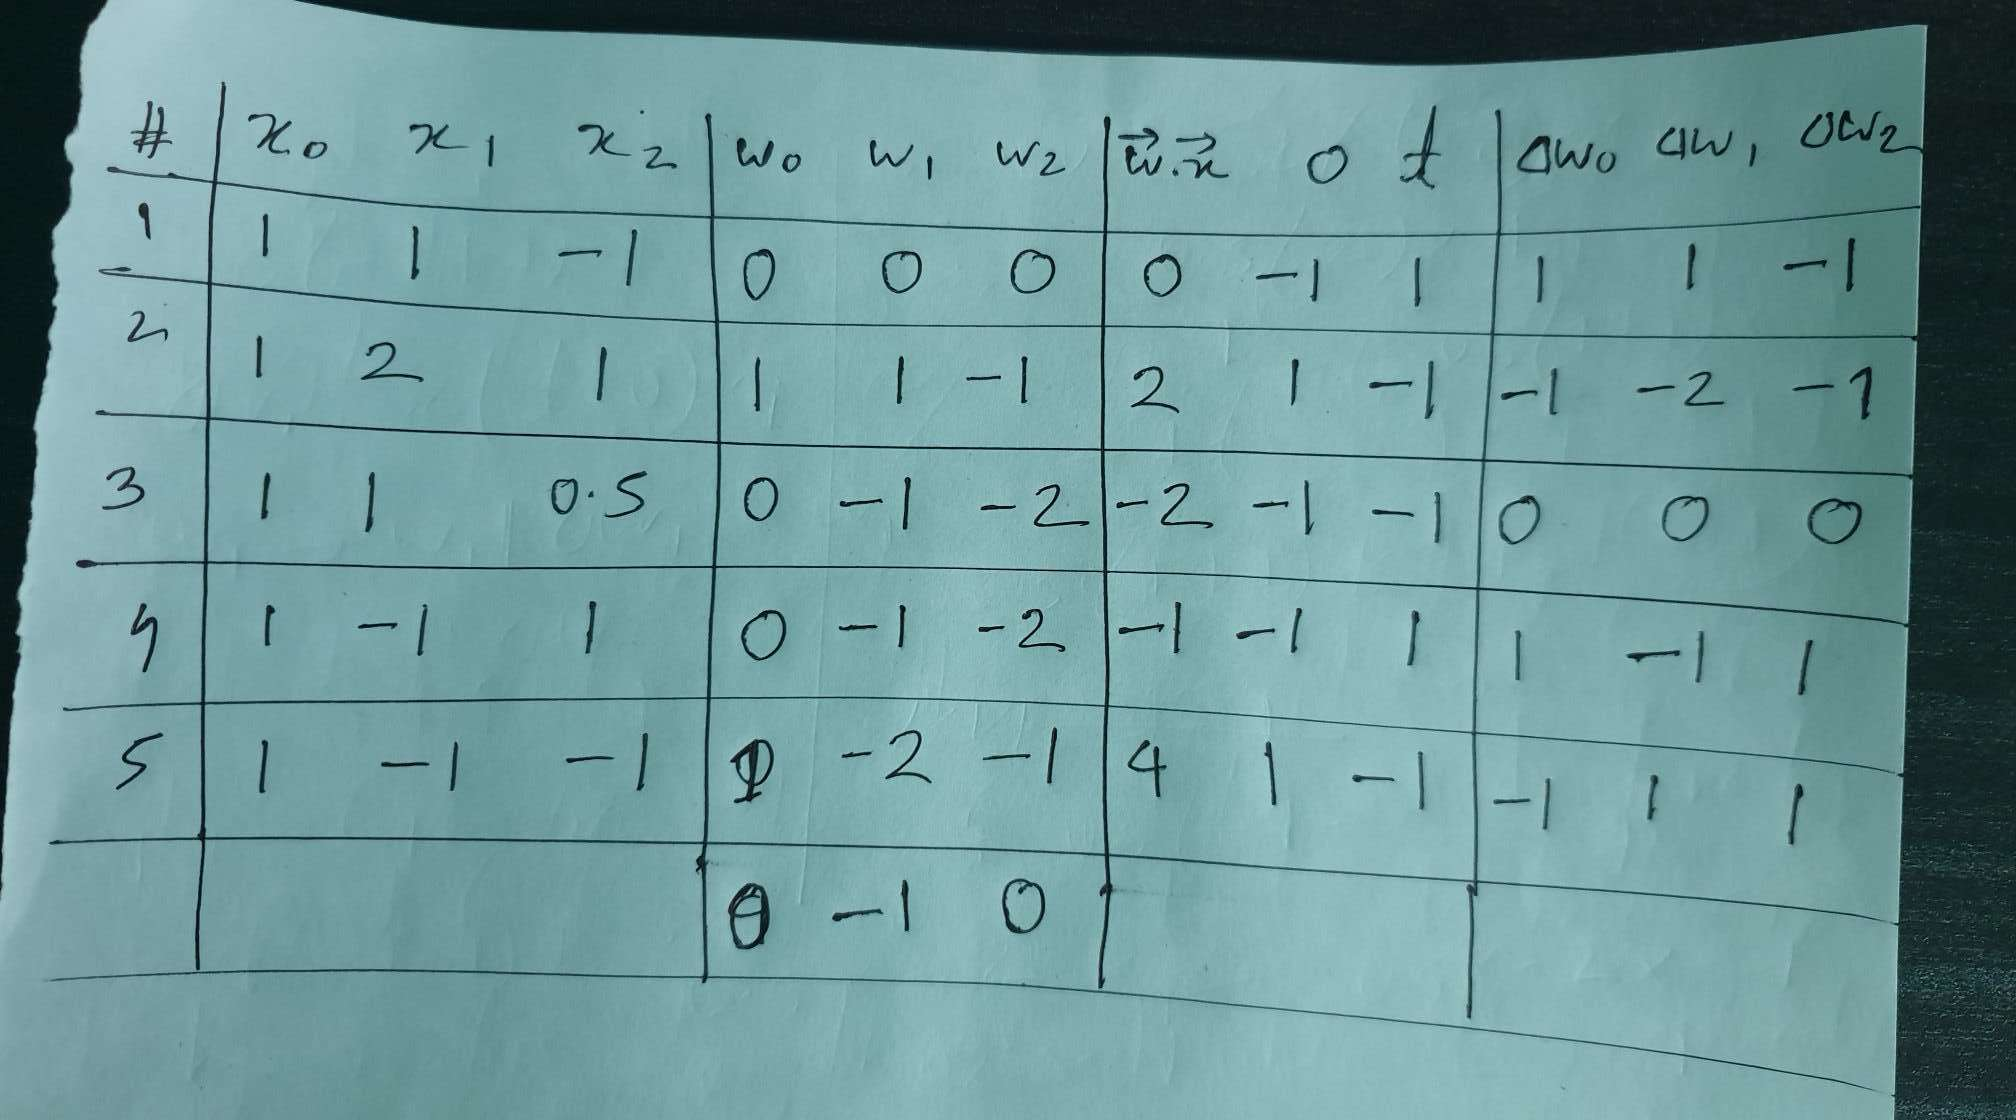

In [6]:
from IPython.display import Image

Image("images/peceptron_training_rule.JPEG")

# 2) Implementing a Perceptron

Let us now implement an own perceptron in Python. The class below already contains a constructor that sets the number of input neurons (__input_dimension__) given by the user and initializes the weights to a vector consisting of all 1's. This weight vector also has to incorporate $w_0$, so we make it larger than the inputs by 1 entry.

Your job is to extend the code below with a class function __output__ that waits for a numpy array holding the input values. This function should calculate the forward pass of the perceptron and output the corresponding value (-1 or 1).

In [24]:
import numpy as np

class Perceptron:
    def __init__(self, input_dimension):
        self.input_dimension = input_dimension
        self.weights = np.ones(input_dimension + 1) # can be adapted to any weight initialization
    
    def output(self, input_vector):
        yin = self.weights[0]
        for i in range(len(input_vector)-1):
            yin = yin + input_vector[i]*self.weights[i+1]
            
        if(yin>0): return 1
        else: return -1
        

perceptron = Perceptron(2)
array = np.array([(1,2,1), (4,-1,-1), (-3,-2,1), (-1,1,-1)])
for i in range(len(array)):
    output = perceptron.output(array[i])
    print(output)

1
1
-1
1


# 3) Implement the Perceptron Training Rule

Now that you performed the Perceptron Training Rule manually, and implemented a Perceptron, the next step is to implement the perceptron training rule in Python 3 (see lecture 4, slide 9). The function for this training rule could, for example, take a perceptron, a training instance, and the learning rate as parameters. Calling such function would complete one training *step* with the single instance.

As previously specified, we will not use random initial values for the weights, but use a value of 1 as the initial value for all weights.

In [26]:
def perceptron_rule(perceptron, input_vector, learning_rate):
    o = perceptron.output(input_vector)
    t = input_vector[len(input_vector)-1]
    print(o, t)
    if(o != t):
        deltaW = learning_rate * (t-o) * 1
        perceptron.weights[0] = perceptron.weights[0] + deltaW
            
        for i in range(len(input_vector)-1):
            deltaW = learning_rate * (t-o) * input_vector[i]
            perceptron.weights[i+1] = perceptron.weights[i+1] + deltaW
            
        print(perceptron.weights)
    
    

### 3 b) Using the Perceptron Training Rule

Use your implementation of the perceptron training rule to train a perceptron using the following training set *D*:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-wp8o{border-color:#000000;text-align:center;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-73oq{border-color:#000000;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky">#</th>
    <th class="tg-73oq">x1</th>
    <th class="tg-73oq">x2</th>
    <th class="tg-0pky">t</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-c3ow">1</td>
    <td class="tg-wp8o">1</td>
    <td class="tg-wp8o">2</td>
    <td class="tg-c3ow">1</td>
  </tr>
  <tr>
    <td class="tg-c3ow">2</td>
    <td class="tg-wp8o">4</td>
    <td class="tg-wp8o">-1</td>
    <td class="tg-c3ow">-1</td>
  </tr>
  <tr>
    <td class="tg-c3ow">3</td>
    <td class="tg-wp8o">-3</td>
    <td class="tg-wp8o">-2</td>
    <td class="tg-c3ow">1</td>
  </tr>
  <tr>
    <td class="tg-c3ow">4</td>
    <td class="tg-wp8o">-1</td>
    <td class="tg-wp8o">1</td>
    <td class="tg-c3ow">-1</td>
  </tr>
</tbody>
</table>

Note: Neither the running number (#) or target concept *t* are attributes.

Choose the learning rate $\eta = 0.5$. Train the perceptron with the given training examples. Consider the training set 5 times (so, 5 epochs with 4 steps each). Afterwards, let your perceptron classify each training example again and print out whether the classification was correct or not.

In [27]:
perceptron = Perceptron(2)
array = np.array([(1,2,1), (4,-1,-1), (-3,-2,1), (-1,1,-1)])

for k in range(5):
    for i in range(len(array)):
        perceptron_rule(perceptron, array[i], 0.5)
    print('\n')

1 1
1 -1
[ 0. -3.  2.]
1 1
1 -1
[-1. -2.  1.]


-1 1
[ 0. -1.  3.]
-1 -1
-1 1
[ 1. -4.  1.]
1 -1
[ 0. -3.  0.]


-1 1
[ 1. -2.  2.]
-1 -1
1 1
1 -1
[ 0. -1.  1.]


1 1
-1 -1
1 1
1 -1
[-1.  0.  0.]


-1 1
[0. 1. 2.]
1 -1
[-1. -3.  3.]
1 1
1 -1
[-2. -2.  2.]




# 4) Multilayer Perceptron:
Given the following multilayer perceptron, first calculate the forward pass through the network. <br>
Then apply the backpropagation algorithm to adjust the weights.

The neuron's activation function is a **sigmoid activation function**. The learning rate is **0.5**.

**Round every calculation directly to 3 places after the comma. (3 decimal places).**

![title](images/Task_5_description.png)

Space for your solution: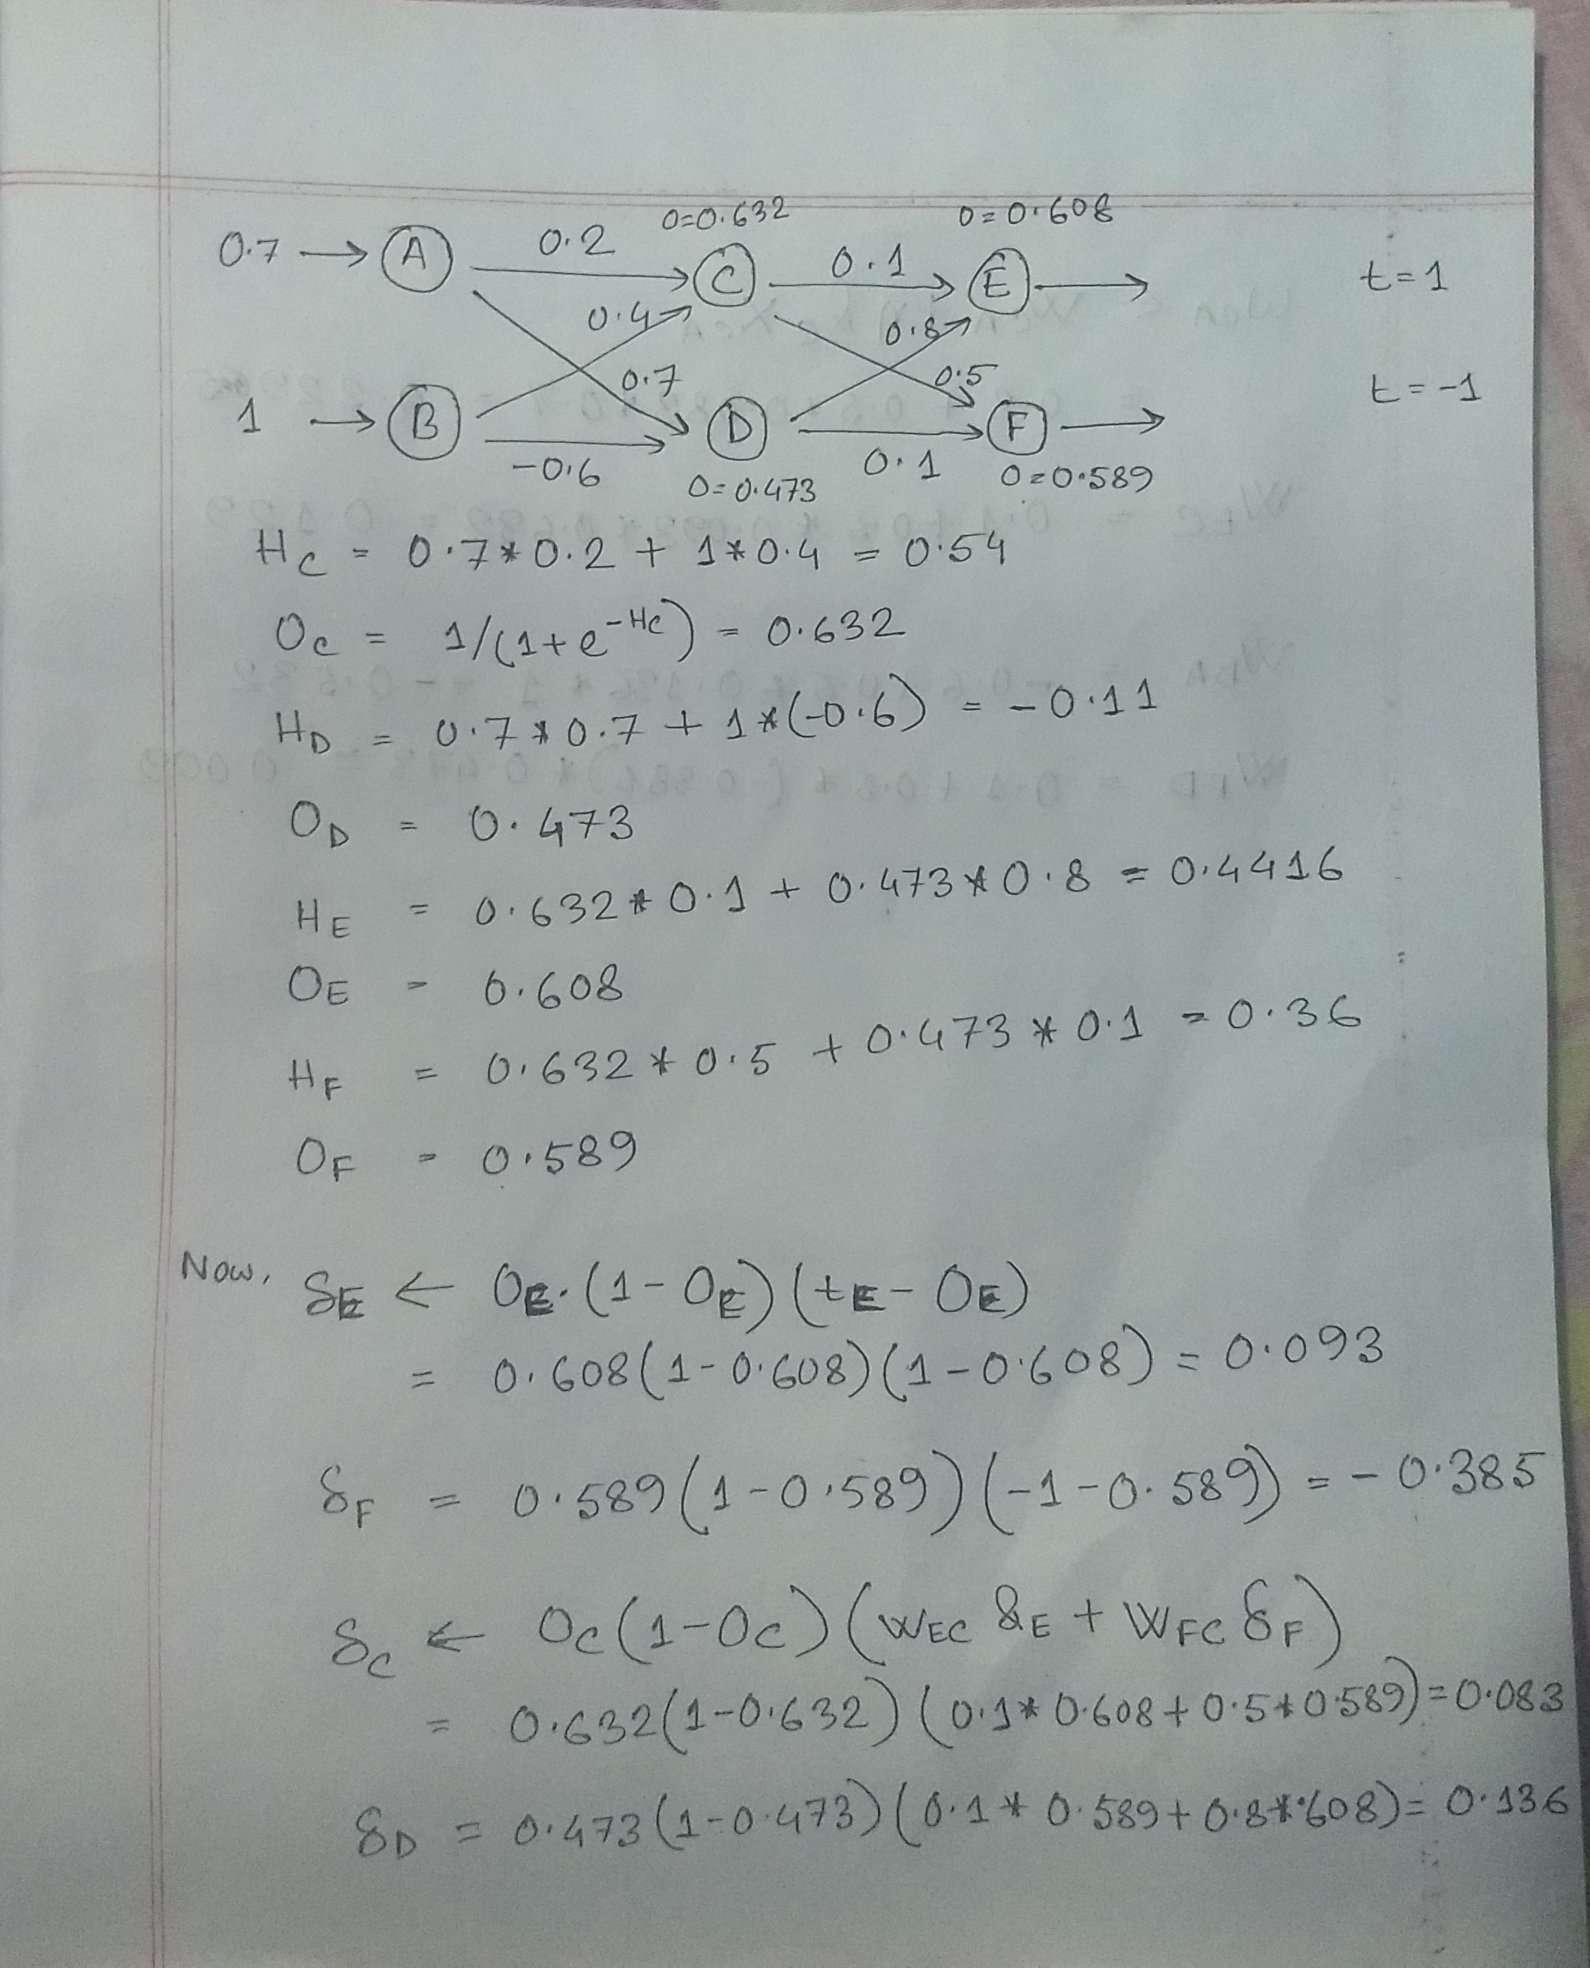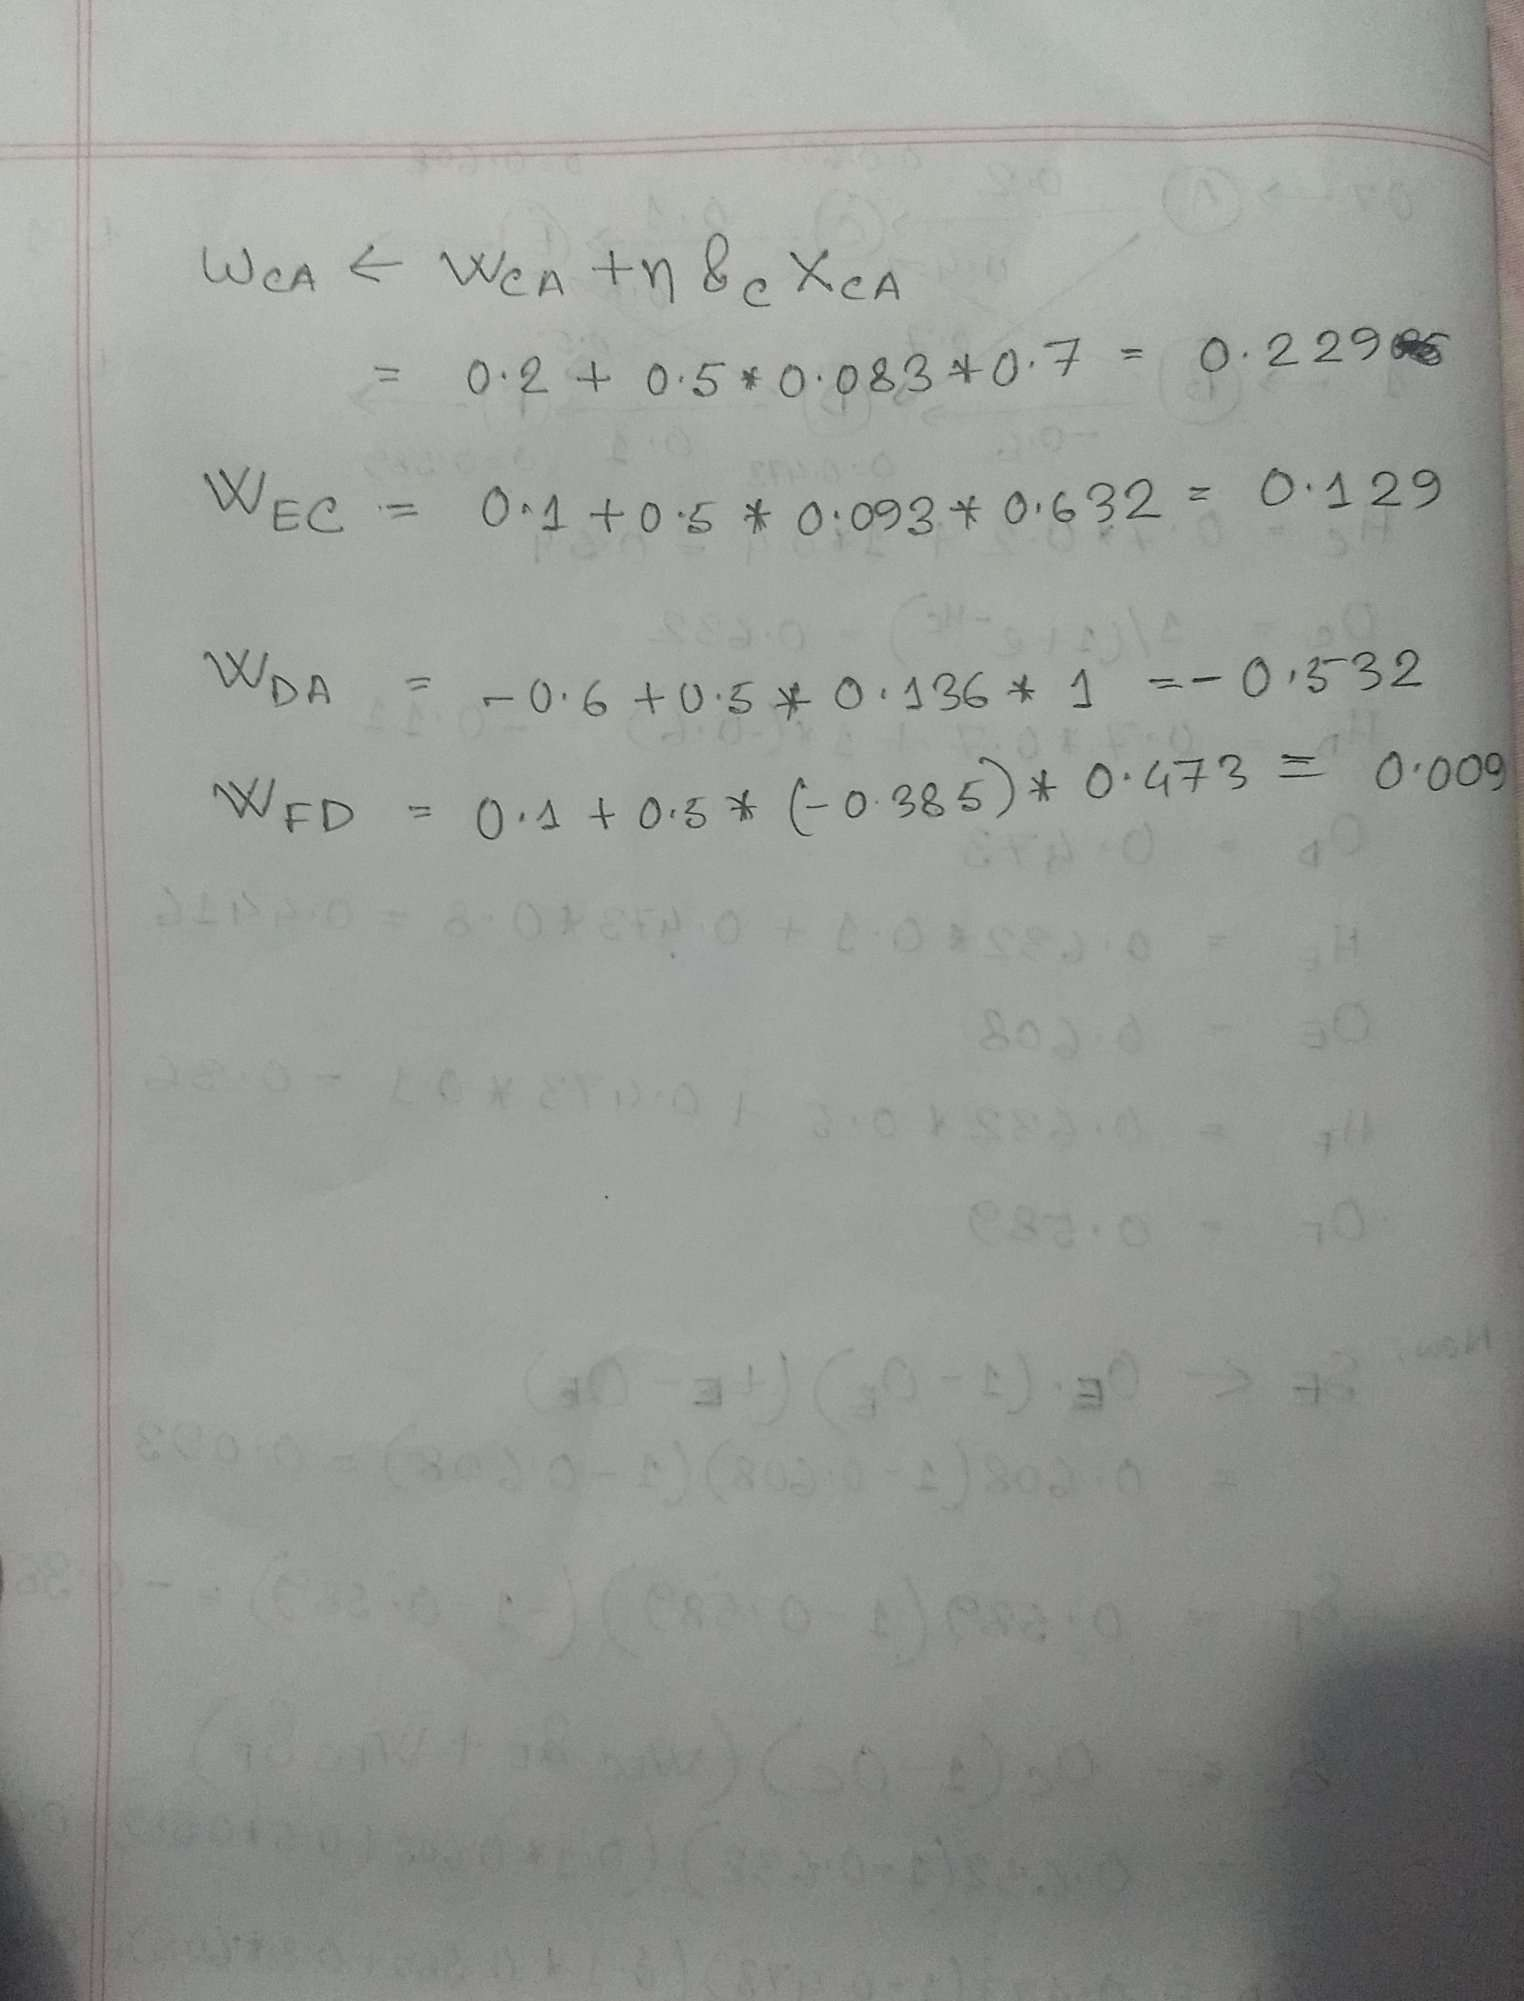


---
# Tips and tricks


### 1) Embedding images
You can embed images in a jupyter notebook on two ways: <br/>
First, you can use the IPython kernel to draw an image everytime the code cell is run like shown below.

In [ ]:
from IPython.display import Image
Image("images/logo.png")

Second, you can embed images directly in a Markdown cell as shown below. You can either use markdown syntax or write plain HTML code. Sometimes HTML code is more practical, as you have much finer control over the HTML elements.

1. Markdown syntax:
![title](images/logo.png)
2. HTML syntax
<img src="images/logo.png" style="width: 70px;"/>

If you are having trouble with **markdown images not refreshing after you change them on disk** you need to refresh your browser. The browser chaches images and the old image is still in the cache.